# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.


## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:
In the past in these excercises, I have put these questions statistically.  This time I want to put the questions into business terms. 
1) How many bikes do I need for the next year? To make a this decision it this I need to understand how the bikes have been used this year, and then based on the data I can make a data based decision.  
2) How many bikes does a Station need to have?  I could imagine that bikes could be moved from one station to another each day.  To make a data based decision, I need understand how many bikes are being used by each station in a day. 


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [ ]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [6]:
import unicodecsv

def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    # On my computer I changed bike-share-analysis to bike_share_analysis so that the city would have the correct value
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'rb') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        # I used the read CSV function from Udacīty Introduction to data analysis, but I made a list within the function 
        trip_reader = list(unicodecsv.DictReader(f_in))
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        # I get the first_trip as the first record in the trip_reader list 
        
        first_trip = trip_reader[0]
        #print('first_trip',first_trip)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
# I defined where the files are located on my computer 

nyc_first_trip = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-CitiBike-2016.csv'
chicago_first_trip = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-Divvy-2016.csv'
washington_first_trip = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-CapitalBikeshare-2016.csv'

# I redefined the data_files list so that it would have the file locations on my computer 
data_files = [nyc_first_trip,chicago_first_trip,washington_first_trip]

# these are the data_file that were in the orginal notebook 
#data_files = ['./data/NYC-CitiBike-2016.csv',
#              './data/Chicago-Divvy-2016.csv',
#              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
# I looked at the first record and field of each CSV, it look correct
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
    
print(example_trips)


City: NYC

City: Chicago

City: Washington
{'NYC': OrderedDict([('tripduration', '839'), ('starttime', '1/1/2016 00:09:55'), ('stoptime', '1/1/2016 00:23:54'), ('start station id', '532'), ('start station name', 'S 5 Pl & S 4 St'), ('start station latitude', '40.710451'), ('start station longitude', '-73.960876'), ('end station id', '401'), ('end station name', 'Allen St & Rivington St'), ('end station latitude', '40.72019576'), ('end station longitude', '-73.98997825'), ('bikeid', '17109'), ('usertype', 'Customer'), ('birth year', ''), ('gender', '0')]), 'Chicago': OrderedDict([('trip_id', '9080545'), ('starttime', '3/31/2016 23:30'), ('stoptime', '3/31/2016 23:46'), ('bikeid', '2295'), ('tripduration', '926'), ('from_station_id', '156'), ('from_station_name', 'Clark St & Wellington Ave'), ('to_station_id', '166'), ('to_station_name', 'Ashland Ave & Wrightwood Ave'), ('usertype', 'Subscriber'), ('gender', 'Male'), ('birthyear', '1990')]), 'Washington': OrderedDict([('Duration (ms)', 

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two. It also turns out that there are some trips in the New York city dataset that do not have an attached user type. Since we don't have enough information to fill these values in, just leave them as-is for now.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [9]:


def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    # need to initialize duration 
    duration = 0 
    
    # NYC and Chicago have the tripduation in the 'tripduration' column in seconds, I convert to minutes by
    # dividing by 60 and use the round function to get method to get 4 significant digits 
    if city == 'NYC' or city == 'Chicago':
        tripduration = int(datum['tripduration'])
        duration = round(tripduration / 60,4)
    # if else, then this is Washington, that means to get tripduration I need to get the Duration (ms) column
    # then I need to conver the milliseconds into seconds and then divide by 60, I use the round function to 
    # get to 4 significant digits
    elif city == 'Washington':
        tripduration = int(datum['Duration (ms)'])
        duration = round((tripduration / 1000) / 60,4)
    else:
        print('undefined city - need to analyze new city data and update python scripts before usage')
    
    
    return (duration)

# if I were doing this on my own I would do this simmpler, I would individually load CSVs, but 
# it look like you also want to see Python programming skills 

# I initialize the tests dictionary 
tests = {}

# I make a listofkey lists so that I have a list of cities 
listofkeys = list(example_trips.keys())
# I use a for statement to get each city into key item 
for keyitem in listofkeys: 
# I make a test_record to put into the tests dictionary, I use the duration_in_mins fuction to get the duration in 
# minutes, the city and duration is assigned to the test record 
    test_record = duration_in_mins(example_trips[keyitem],keyitem)
# I then add the duration and city to the tests dictionary 
    tests[keyitem] = test_record
    #print ('tests',tests)

# I make a print of what I have made so that I can see it and also understand any testing errors, I had more print 
# statements but I have erased them for handing in the project 
print ('test dictionary', tests)





# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

test dictionary {'NYC': 13.9833, 'Chicago': 15.4333, 'Washington': 7.1231}


In [10]:
from datetime import datetime as dt

# this is the one to hand in, do not erase 

def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    # getting the day of the week, month and hour, itself could be function
    # if my organization would have requirments for such a data I would make a function
    # but for this project I will keep it simple. 
    # Chicago, Washington, and NYC are all a little different for start time, that is why 
    # each gets its own if statement 
    if city == 'Chicago':
        startime = datum['starttime']
        # I got the day of the week from Stack overflow, first need to convert to the Python data and then
        # I can get the day of the week.  For other languages, it look like one would have to make a function
        # using get the day of the week as an integer, but with English one can use the Python methods 
        day_of_week = dt.strptime(startime, '%m/%d/%Y %H:%M').strftime('%A')
        # need to convert the data into a python date and time 
        fullstartdate = dt.strptime(startime, '%m/%d/%Y %H:%M')
        # I get the month using the month function applied to the python data 
        month = fullstartdate.month
        # I get the hour using the hour function applied to the python data
        hour = fullstartdate.hour
    elif city == 'Washington': 
        # Washington startime uses a different field from its dictionary
        startime = datum['Start date']
        day_of_week = dt.strptime(startime, '%m/%d/%Y %H:%M').strftime('%A')
        fullstartdate = dt.strptime(startime, '%m/%d/%Y %H:%M')
        month = fullstartdate.month
        hour = fullstartdate.hour      
    elif city == 'NYC':
        datum_record = datum
        startime = datum['starttime']
        # NYC has seconds it its date time information 
        day_of_week = dt.strptime(startime, '%m/%d/%Y %H:%M:%S').strftime('%A')
        fullstartdate = dt.strptime(startime, '%m/%d/%Y %H:%M:%S')
        month = fullstartdate.month
        hour = fullstartdate.hour
    else:
        print('undefined city - need to analyze new city data and update python scripts before usage')
    
      
    return (month, hour, day_of_week)

# if I were doing this on my own I would do this simmpler, I would individually load CSVs, but 
# it look like you also want to see Python programming skills 
# I am repeating the for loop logic from the duration_in_mintues fuction

# I initialize the tests dictionary 

tests = {}

# I make a listofkey lists so that I have a list of cities

listofkeys = list(example_trips.keys())
# I initialize count
count = -1 
# I use a for statment to get each city into key item
for keyitem in listofkeys: 
    count += 1 
# I make a test_record to put into the tests dictionary, I use the time_of_trip fuction to get a list  
# of the trips startdate month, hour, and not integer day of the wee, I assign city and the list to the test record      
    test_record = time_of_trip(example_trips[keyitem],keyitem)
# I then add the lists and city to the tests dictionary 
    tests[keyitem] = test_record
    
    
# I make a print of what I have made so that I can see it and also understand any testing errors, I had more print 
# statement but I have erased them for handing in the project 
    
print ('test dictionary', tests)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

test dictionary {'NYC': (1, 0, 'Friday'), 'Chicago': (3, 23, 'Thursday'), 'Washington': (3, 22, 'Thursday')}


In [11]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. NYC has some data points with a missing user type; you can leave
    these as they are (empty string).
    """
    
    # YOUR CODE HERE
    # I converted the CSV file into an Excel file and filered.  It looks like that a Subscriber more frequently uses 
    # the bike rental because there is birth data and gender information for NYC and Chicago
    # NYC and Chicago have the same type of user type for this excercise, I have noted that NYC does have none user 
    # types which look like subscribers to me because that have birth year and gender, but I will add to the code when the 
    # whole CSV file needs to be processed 
    if city == 'NYC':
        user_type = datum['usertype']
        
    elif city == 'Chicago':
        user_type = datum['usertype']   
        
    # if else, then this is Washington, Washing has two things, in its CSV user type is 'Member Type' and the values 
    # or 'Registered' and 'Casual'. For Washington, it seems that 'Registered' is the equivalent of 'Subscriber' because 
    # of the name, and the Udacity supplied test case 
    
    elif city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
            
    else: 
         print('undefined city - need to analyze new city data and update python scripts before usage') 
    
    return user_type



# if I were doing this on my own I would do this simmpler, I would individually load CSVs, but 
# it look like you also want to see Python programming skills 
# I am repeating the for loop logic from the duration_in_mintues fuction

# I initialize the tests dictionary 

tests = {}

# I make a listofkey lists so that I have a list of cities

listofkeys = list(example_trips.keys())
# I initialize count
count = -1 
# I use a for statment to get each city into key item
for keyitem in listofkeys: 
    count += 1 
# I make a test_record to put into the tests dictionary, I use the time_of_trip fuction to get a list  
# of the trips startdate month, hour, and not integer day of the wee, I assignt city and the list to the test record      
    test_record = type_of_user(example_trips[keyitem],keyitem)
# I then add the lists and city to the tests dictionary 
    tests[keyitem] = test_record
    
    
# I make a print of what I have made so that I can see it and also understand any testing errors, I had more print 
# statement but I have erased them for handing in the project 
    
print ('test dictionary', tests)





# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

test dictionary {'NYC': 'Customer', 'Chicago': 'Subscriber', 'Washington': 'Subscriber'}


**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [12]:
import unicodecsv
from datetime import datetime as dt
import csv


# I looked at how the function should be built according to Udacity, I first built the read part using the 
# test fuctions I had built.  Then I added in the write part.  I added extra files to the existing dictionaries
# then I built the condense data dectionaries by deleting files that were not needed from the existing dictionaries
# and then making a new dictionary.  The write part went pretty easily because I figured out how to do this 
# when I was working on Introduction to Data Analysis 

def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with  open(out_file, 'w',newline='') as f_out, open(in_file, 'rb') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        
        ## TODO: set up csv DictReader object ##
        print ('infile and city',in_file,city)
        # I added start station id and start station name because I want to explore this later
        # out colunames, trip writer, and writheader set up how we are going to make the outgoing file 
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type','start_station_id','start_station_name']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        
        # I initialized new_point here 
        new_point = {}
        
        # read the in file as a list 
        trip_reader =  list(unicodecsv.DictReader(f_in))
        #print('trip reader first record',trip_reader[100])
        
        
        # collect data from and process each row
        
        def duration_in_mins(datum, city):
            """
            Takes as input a dictionary containing info about a single trip (datum) and
            its origin city (city) and returns the trip duration in units of minutes.
    
            Remember that Washington is in terms of milliseconds while Chicago and NYC
            are in terms of seconds. 
    
            HINT: The csv module reads in all of the data as strings, including numeric
            values. You will need a function to convert the strings into an appropriate
            numeric type when making your transformations.
            see https://docs.python.org/3/library/functions.html
            """
            
    # need to initialize duration 
            duration = 0 
    
    # NYC and Chicago have the tripduation in the 'tripduration' column in seconds, I convert to minutes by
    # dividing by 60 and use the round function to get method to get 4 significant digits 
            if city == 'NYC' or city == 'Chicago':
                tripduration = int(datum['tripduration'])
                duration = round(tripduration / 60,4)
    # if else, then this is Washington, that means to get tripduration I need to get the Duration (ms) column
    # then I need to conver the milliseconds into seconds and then divide by 60, I use the round function to 
    # get to 4 significant digits
            elif city == 'Washington':
                tripduration = int(datum['Duration (ms)'])
                duration = round((tripduration / 1000) / 60,4)
            else:
                # if I were doing this at work I would put in this else to get a warning if I use another city
                print('undefined city - need to analyze new city data and update python scripts before')
    
    
            return (duration)
              
        def time_of_trip(datum, city):
            """
            Takes as input a dictionary containing info about a single trip (datum) and
            its origin city (city) and returns the month, hour, and day of the week in
            which the trip was made.
    
            Remember that NYC includes seconds, while Washington and Chicago do not.
    
            HINT: You should use the datetime module to parse the original date
            strings into a format that is useful for extracting the desired information.
            see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
            """
    
        # YOUR CODE HERE
        # getting the day of the week, month and hour, itself could be function
        # if my organization would have requirments for such a data I would make a function
        # but for this project I will keep it simple. 
        # Chicago, Washington, and NYC are all a little different for start time, that is why 
        # each gets its own if statement 
            if city == 'Chicago':
                startime = datum['starttime']
        # I got the day of the week from Stack overflow, first need to convert to the Python date and then
        # I can get the day of the week.  For other languages, it look like one would have to make a function
        # using get the day of the week as an integer, but with English one can use the Python methods 
                day_of_week = dt.strptime(startime, '%m/%d/%Y %H:%M').strftime('%A')
        # need to convert the data into a python date and time 
                fullstartdate = dt.strptime(startime, '%m/%d/%Y %H:%M')
        # I get the month using the month method applied to the python data 
                month = fullstartdate.month
        # I get the hour using the hour method applied to the python data
                hour = fullstartdate.hour
            elif city == 'Washington': 
                startime = datum['Start date']
                day_of_week = dt.strptime(startime, '%m/%d/%Y %H:%M').strftime('%A')
                fullstartdate = dt.strptime(startime, '%m/%d/%Y %H:%M')
                month = fullstartdate.month
                hour = fullstartdate.hour      
            elif city == 'NYC':
                datum_record = datum
                startime = datum['starttime']
                day_of_week = dt.strptime(startime, '%m/%d/%Y %H:%M:%S').strftime('%A')
                fullstartdate = dt.strptime(startime, '%m/%d/%Y %H:%M:%S')
                month = fullstartdate.month
                hour = fullstartdate.hour
            else:
                print('undefined city - need to analyze new city data and update python scripts before')
    
      
            return (month, hour, day_of_week)
        
        
        def type_of_user(datum, city):
            """
            Takes as input a dictionary containing info about a single trip (datum) and
            its origin city (city) and returns the type of system user that made the
            trip.
    
            Remember that Washington has different category names compared to Chicago
            and NYC. NYC has some data points with a missing user type; you can leave
            these as they are (empty string).
            """
    
    # YOUR CODE HERE
    # I converted the CSV file into an Excel file and filered.  It looks like that a Subscriber more frequently uses 
    # the bike rental because there is birth data and gender information for NYC and Chicago
    # NYC and Chicago have the same type of user type for this excercise, I have noted that NYC does have none user 
    # types which look like subscribers to me because that have birth year and gender, in the Condensed Data function
    # I convert NYC nones to Subscriber 
            if city == 'NYC':
                if datum['usertype'] != '':
                    user_type = datum['usertype']
                else:
                    user_type = 'Subscriber'
        
            elif city == 'Chicago':
                user_type = datum['usertype']   
        
    # if else, then this is Washington, Washington has two things, in its CSV user type is 'Member Type' and the values 
    # or 'Registered' and 'Casual' for this excercise I will just define type_of_user as 'Subscriber', when I read the 
    # whole CSV file I have converted 'Casual'to 'Customer'
    # For Washington, it seems that 'Registered' is the equavalent of 'Subscriber' because of the name, and the Udacity
    # supplied test case 
    
            elif city == 'Washington':
                if datum['Member Type'] == 'Registered':
                    user_type = 'Subscriber'
                else:
                    user_type = 'Customer'
            
            else: 
                print('undefined city - need to analyze new city data and update python scripts before usage') 
    
            return user_type
    
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            # I add the new fields to trip_reader and call my functions to get data
            # I tried and thought about making a new dictionary here, but there was not a logical 
            # unique index filed to use.  Maybe I could have used a counter but I decided to add
            # extra fields to the existing dictionaries 
            row['duration']     = duration_in_mins(row,city)
            time_record         = time_of_trip(row,city)
            row['month']        = time_record[0]
            row['hour']         = time_record[1]
            row['day_of_week']  = time_record[2]
            row['user_type']    = type_of_user(row,city)
            
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
        
     

        # collect data from and process each row# collect data from and process each row
        
                    
        if city == 'Chicago':
            # now I delete the fields that I will not use for futher analysis, I also standardize 
            # start station id and start station name 
            for delrow in trip_reader:
                del delrow['trip_id']
                del delrow['starttime'] 
                del delrow['stoptime']
                del delrow['bikeid']
                del delrow['tripduration']
                delrow['start_station_id'] = delrow['from_station_id']
                delrow['start_station_name'] = delrow['from_station_name']
                del delrow['from_station_id']
                del delrow['from_station_name']
                del delrow['to_station_id']
                del delrow['to_station_name']
                del delrow['usertype']
                del delrow['gender']
                del delrow['birthyear']
                
        if city == 'Washington':
            for delrow in trip_reader:
                del delrow['Duration (ms)']
                del delrow['Start date']
                del delrow['End date']
                delrow['start_station_id'] = delrow['Start station number']
                delrow['start_station_name'] = delrow['Start station']
                del delrow['Start station number']
                del delrow['Start station']
                del delrow['End station number']
                del delrow['End station']
                del delrow['Bike number']
                del delrow['Member Type']
        
        if city == 'NYC':
            for delrow in trip_reader:
                del delrow['tripduration']
                del delrow['starttime']
                del delrow['stoptime']
                delrow['start_station_id'] = delrow['start station id']
                delrow['start_station_name'] = delrow['start station name']
                del delrow['start station id']
                del delrow['start station name']
                del delrow['start station latitude']
                del delrow['start station longitude']
                del delrow['end station id']
                del delrow['end station name']
                del delrow['end station latitude']
                del delrow['end station longitude']
                del delrow['bikeid']
                del delrow['usertype']
                del delrow['birth year']  
                del delrow['gender']
        # I set new_point to trip_reader                    
        new_point = trip_reader
        
    
        # I write new point to the outgoing file    
        for new_point_record in new_point:
            trip_writer.writerow(new_point_record)
        # I want to know if the function finished  
        print('finished')
        return(None)

#nyc_in_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-CitiBike-2016.csv'
#chicago_in_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-Divvy-2016.csv'
#washington_in_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-CapitalBikeshare-2016.csv'
#nyc_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-2016-Summary.csv'
#chicago_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv'
#washington_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-2016-Summary.csv'


#nyc_dictionary = condense_data(nyc_in_file,nyc_out_file,'NYC')
#chicago_dictionary = condense_data(chicago_in_file,chicago_out_file,'Chicago')  
#washington_dictionary = condense_data(washington_in_file,washington_out_file,'Washington')

#I first made and tested incoming and then added outgoing
            

In [13]:
# Run this cell to check your work

# I define the file locations on my computer here 
nyc_in_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-CitiBike-2016.csv'
chicago_in_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-Divvy-2016.csv'
washington_in_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-CapitalBikeshare-2016.csv'
nyc_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-2016-Summary.csv'
chicago_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv'
washington_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-2016-Summary.csv'

city_info = {'Washington': {'in_file': washington_in_file,
                            'out_file': washington_out_file},
             'Chicago': {'in_file': chicago_in_file,
                         'out_file': chicago_out_file},
             'NYC': {'in_file': nyc_in_file,
                     'out_file': nyc_out_file}}
test_out_trips = {}
# I used the udacity supply For statment to read in all the files and make out files 
for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    city, first_trip = print_first_point(filenames['out_file'])
    test_out_trips[city]   = first_trip

# I verify that it the functions are working OK by validating the first record of the out file 
print(test_out_trips)

infile and city C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-CapitalBikeshare-2016.csv Washington
finished

City: Washington
infile and city C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-Divvy-2016.csv Chicago
finished

City: Chicago
infile and city C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-CitiBike-2016.csv NYC
finished

City: NYC
{'Washington': OrderedDict([('duration', '7.1231'), ('month', '3'), ('hour', '22'), ('day_of_week', 'Thursday'), ('user_type', 'Subscriber'), ('start_station_id', '31602'), ('start_station_name', 'Park Rd & Holmead Pl NW')]), 'Chicago': OrderedDict([('duration', '15.4333'), ('month', '3'), ('hour', '23'), ('day_of_week', 'Thursday'), ('user_type', 'Subscriber'), ('start_station_id', '156'), ('start_station_name', 'Clark St & Wellington Ave')]), 'NYC': OrderedDict([('duration', '13.9833'), ('month', '1'), ('hour', '0'), ('day_of_week'

> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: Replace this text with your response!

In [14]:
import unicodecsv

def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """

    with open(filename, 'rb') as f_in:
        # set up csv reader object
    
        reader = list(unicodecsv.DictReader(f_in))
        
        # initialize count variables

        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            elif row['user_type'] == 'Customer':
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)
    


My answer to Question 4A
Question 4a: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?
As one could expect, New York City had the highest number of trips - 276,798. New York City also had the highest proportion of trips made by subscribers at 89.09%.  While Chicago had the highest proportion of trips made by short-term customers at 23.77% 



In [15]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
#This is for New York
nyc_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-2016-Summary.csv'
chicago_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv'
washington_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-2016-Summary.csv'
nyc_trips = number_of_trips(nyc_out_file)
# I used the tuples to calculation the proportions 
percent_by_subscribers = round(((nyc_trips[0] / nyc_trips[2]) * 100),2)
percent_by_customers = round(((nyc_trips[1] / nyc_trips[2]) * 100),2)
#print(percent_by_subscribers,percent_by_customers,nyc_trips)
print("New York City Bike Share had {} bike trips in 2016. {}% were taken by subscribers and {}% were taken by \n short term customers.".format(nyc_trips[2],percent_by_subscribers,percent_by_customers))
#print(number_of_trips(nyc_out_file))

New York City Bike Share had 276798 bike trips in 2016. 89.09% were taken by subscribers and 10.91% were taken by 
 short term customers.


In [16]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
#This is for Chicago
nyc_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-2016-Summary.csv'
chicago_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv'
washington_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-2016-Summary.csv'
chicago_trips = number_of_trips(chicago_out_file)
percent_by_subscribers = round(((chicago_trips[0] / chicago_trips[2]) * 100),2)
percent_by_customers = round(((chicago_trips[1] / chicago_trips[2]) * 100),2)
#print(percent_by_subscribers,percent_by_customers,nyc_trips)
print("Chicago Bike Share had {} bike trips in 2016. {}% were taken by subscribers and {}% were taken by \n short term customers.".format(chicago_trips[2],percent_by_subscribers,percent_by_customers))
#print(number_of_trips(nyc_out_file))

Chicago Bike Share had 72131 bike trips in 2016. 76.23% were taken by subscribers and 23.77% were taken by 
 short term customers.


In [17]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
#This is for Washington
nyc_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-2016-Summary.csv'
chicago_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv'
washington_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-2016-Summary.csv'
washington_trips = number_of_trips(washington_out_file)
percent_by_subscribers = round(((washington_trips[0] / washington_trips[2]) * 100),2)
percent_by_customers = round(((washington_trips[1] / washington_trips[2]) * 100),2)
#print(percent_by_subscribers,percent_by_customers,nyc_trips)
print("Washington Bike Share had {} bike trips in 2016. {}% were taken by subscribers and {}% were taken by \n short term customers.".format(washington_trips[2],percent_by_subscribers,percent_by_customers))
#print(number_of_trips(nyc_out_file))

Washington Bike Share had 66326 bike trips in 2016. 78.03% were taken by subscribers and 21.97% were taken by 
 short term customers.


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: My answers to this question are in my function calls to my 'analyze_data' function. 

In [ ]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##



In [20]:
import unicodecsv

def read_data(filename):
    """
    This functions reads in Bike Share analysis summary files and configures fields to need python data types 
    """
    
    with open(filename, 'rb') as f_in:
        ## make as a list dictionary
        trip_reader = list(unicodecsv.DictReader(f_in))
        
        # converat duration to a floating data type 
        for trip in trip_reader:
            trip['duration']     = float(trip['duration'])
            
        #print('first_trip',first_trip)
        
    return (trip_reader)

#here are my files and calls to my function 
nyc_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/NYC-2016-Summary.csv'
chicago_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv'
washington_out_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Washington-2016-Summary.csv'
#washington_summary_data = read_data(washington_out_file)
#print(washington_summary_data[1])
#chicago_summary_data = read_data(chicago_out_file)
#print(chicago_summary_data[100])
nyc_summary_data = read_data(nyc_out_file)
print(nyc_summary_data[1000])




OrderedDict([('duration', 4.7), ('month', '1'), ('hour', '11'), ('day_of_week', 'Monday'), ('user_type', 'Subscriber'), ('start_station_id', '461'), ('start_station_name', 'E 20 St & 2 Ave')])


In [18]:
def analyze_data(data):
    """
    This function takes summary data and performs various types of compututions 
    """
    
    
    # initialize variables, I also think this is where to define what each variable means

    n_subscribers        = 0  # total number of subscribers' bike trips- subscribers are registred in bike share
    n_customers          = 0  # total number of customers' bike trips   - customers are not registered in bike share
    d_customers          = 0  # total duration(minutes) of customers' bike trips  
    d_subscribers        = 0  # total duration(minutes) of subscribers' bike trips
    # short bike trips are less than 30 minutes, long bike trips are more than 30 minutes 
    long_n_subscribers   = 0  # total number of subscribers' long bike trips
    long_d_subscribers   = 0  # total duration(minutes) of  long subscribers' bike trips
    short_n_subscribers  = 0  # total number of subscribers' short bike trips
    short_d_subscribers  = 0  # total duration(minutes) of  short subscribers' bike trips
    long_n_customers     = 0  # total number of customers' long bike trips
    long_d_customers     = 0  # total duration(minutes) of  long customers' bike trips
    short_n_customers    = 0  # total number of customers' short bike trips
    short_d_customers    = 0  # total duration(minutes) of  short customers' bike trips
 
        # tally up ride types
    for row in data:
        if row['user_type'] == 'Subscriber':
            n_subscribers += 1
            d_subscribers = d_subscribers + row['duration']
            if row['duration'] > 29.9999:
                long_n_subscribers += 1
                long_d_subscribers = long_d_subscribers + row['duration']
            else:
                short_n_subscribers += 1
                short_d_subscribers = short_d_subscribers + row['duration']
            
        elif row['user_type'] == 'Customer':
            n_customers += 1
            d_customers = d_customers + row['duration']
            
            if row['duration'] > 29.9999:
                long_n_customers += 1
                long_d_customers = long_d_customers + row['duration']
            else:
                short_n_customers += 1
                short_d_customers = short_d_customers + row['duration']
                #print('chicago short',short_n_customers,row['duration'],short_d_customers)
    
        
        # compute total number of rides
    n_total = n_subscribers + n_customers
        
        # compute total duration of rides 
    d_total = d_subscribers + d_customers
    
        # compute average for all rides 
    average_duration = d_total / n_total
    
        # compute  proportion of subscriber long rides
    l_subscriber_rides_proportion = (long_n_subscribers / n_total) * 100
    
        # compute  proportion of subscriber long rides
    s_subscriber_rides_proportion = (short_n_subscribers / n_total) * 100  
    
        # compute  proportion of subscriber long rides
    l_customers_rides_proportion = (long_n_customers / n_total) * 100
    
        # compute  proportion of subscriber long rides
    s_customers_rides_proportion = (short_n_customers / n_total) * 100 
    
        # get average minutes and seconds - I know this only works will if you already know the average duration
    average_duration_string = str(round(average_duration,2))
    average_minutes = average_duration_string[0:2]
    decimal_seconds = int(average_duration_string[3:5])
    average_seconds = int((decimal_seconds /100) * 60)
        # put put compuation results in tuples computations, short, long, and summary to use for city bike share
        # data analysis 
    computations = (n_total,round(d_total,2),round(average_duration,2),round(l_subscriber_rides_proportion,3),
                    round(s_subscriber_rides_proportion,3),round(l_customers_rides_proportion,3), 
                    round(s_customers_rides_proportion,3), average_minutes, average_seconds)
    short        = (short_n_subscribers,round(short_d_subscribers,4),short_n_customers,round(short_d_customers,4))  
    long         = (long_n_subscribers,round(long_d_subscribers,4),long_n_customers,round(long_d_customers,4))
    summary      = (n_subscribers, n_customers,round(d_subscribers,4),round(d_customers,4))
        # return tallies as a tuple
    return(summary,short,long,computations)


What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

In [21]:
# I run my analyze data function using the city's summary data 
nyc_analyze = analyze_data(nyc_summary_data)
# to anwer the questions I need to use the computation part of the analyze data tuple
nyc_computations = nyc_analyze[3]
# to get long rides I need to add the long subscriber and customer rides together 
nyc_long_rides = nyc_computations[3] +  nyc_computations[5] 
# get the minutes and seconds from the computation part of the analyze data tuple 
print("NYC Bike Share had a {} minute and {} seconds average trip duration in 2016. {} % of trips were longer than 30 minutes.".
      format(nyc_computations[7],nyc_computations[8],nyc_long_rides))

NYC Bike Share had a 15 minute and 48 seconds average trip duration in 2016. 7.317 % of trips were longer than 30 minutes.


In [22]:
chicago_analyze = analyze_data(chicago_summary_data)
chicago_computations = chicago_analyze[3]
chicago_long_rides = chicago_computations[3] +  chicago_computations[5] 
print("Chicago Bike Share had a {} minute and {} seconds average trip duration in 2016. {} % of trips were longer than 30 minutes.".
      format(chicago_computations[7],chicago_computations[8],chicago_long_rides))

Chicago Bike Share had a 16 minute and 33 seconds average trip duration in 2016. 8.347 % of trips were longer than 30 minutes.


In [23]:
washington_analyze = analyze_data(washington_summary_data)
washington_computations = washington_analyze[3]
washington_long_rides = round(washington_computations[3] +  washington_computations[5],3) 
print("Washington Bike Share had a {} minute and {} seconds average trip duration in 2016. {} % of trips were longer than \n 30 minutes.".
      format(washington_computations[7],washington_computations[8],washington_long_rides))

Washington Bike Share had a 18 minute and 55 seconds average trip duration in 2016. 10.839 % of trips were longer than 
 30 minutes.


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Replace this text with your response!

In [ ]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##



In [227]:
# I made all kinds of calculations to explore chicago date 
chicago_analyze = analyze_data(chicago_summary_data)
chicago_short = chicago_analyze[1]
chicago_long  = chicago_analyze[2]
chicago_short_subscriber = round(chicago_short[1] / chicago_short [0],2)
#print(chicago_short_subscriber)
chicago_short_customer = round(chicago_short[3] / chicago_short [2],2)
#print(chicago_short_customer)

chicago_long_subscriber = round(chicago_long[1] / chicago_long [0],2)
#print(chicago_long_subscriber)
chicago_long_customer = round(chicago_long[3] / chicago_long [2],2)
#print(chicago_long_customer)

chicago_subscriber_average = round((chicago_long[1] + chicago_short[1]) / (chicago_long[0]+chicago_short[0]),2)
#print(chicago_subscriber_average)
chicago_customer_average = round((chicago_long[3] +chicago_short[3]) / (chicago_long [2] + chicago_short[2]),2) 
#print(chicago_customer_average)

#print(chicago_short,chicago_long)
chicago_long_rides = chicago_computations[3] +  chicago_computations[5] 
print("In Chicago Bike Share, Customers take longer trips with an average trip duration of {} minutes.  "
      .format(chicago_customer_average))
print("Subscribers take average duration trips of {} minutes. Long trips are defined as having a trip duration of"
      .format(chicago_subscriber_average))
print("more than 30 minutes. What is surprising average long trip duration is almost the same. For Subscribers,")
print("average long trip duration is {} minutes, while for customers the average long trip duration is {} minutes"
      .format(chicago_long_subscriber,chicago_long_customer))
print ("The lower Subscribers'average trip duration can be explained by the fact that they take more short duration trips.")
print("Subscribers took {} short trips, while customers took {} trips. "
      .format(chicago_short[0],chicago_short[2]))     

In Chicago Bike Share, Customers take longer trips with an average trip duration of 30.98 minutes.  
Subscribers take average duration trips of 12.07 minutes. Long trips are defined as having a trip duration of
more than 30 minutes. What is surprising average long trip duration is almost the same. For Subscribers,
average long trip duration is 64.17 minutes, while for customers the average long trip duration is 64.06 minutes
The lower Subscribers'average trip duration can be explained by the fact that they take more short duration trips.
Subscribers took 53801 short trips, while customers took 12309 trips. 


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

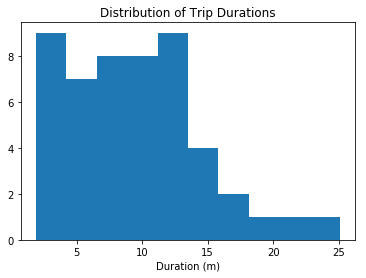

In [25]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [26]:
def duration_data(data):
    """
    This function takes summary data and performs various types of compututions 
    """
    
    duration_data_list     = [] # a list of all duration data
    subscriber_less75_list = [] # a list of subscriber data with a duraiton of less than 75 minutes 
    customer_less75_list   = [] # a list of subscriber data with a duration of less than 75 minutes
        # tally up ride types
    for row in data:
    # I add all duration records to a duration list for verification purposes - does the amount of 
    # records look believalbe using statistical information - later I use data frame describe 
        duration_data_list.append(row['duration'])
    # if subsubscriber and and duration is less than 75 minues, I add to the list
        if row['user_type'] == 'Subscriber' and row['duration'] < 75:
            subscriber_less75_list.append(row['duration'])
        elif row['user_type'] == 'Customer' and row['duration'] < 75:
            customer_less75_list.append(row['duration'])
    return(duration_data_list,subscriber_less75_list,customer_less75_list)

chicago_duration_data_list = duration_data(chicago_summary_data)

len(chicago_duration_data_list[0])
        
        

72131

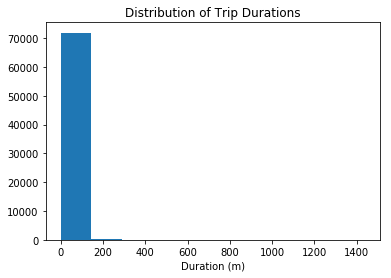

In [27]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = chicago_duration_data_list[0]
# when we work with NP arrays, there are more possibilities. 
#bins = [0,5,10,15,20,25,30,45,60,90]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()



If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Replace this text with your response!

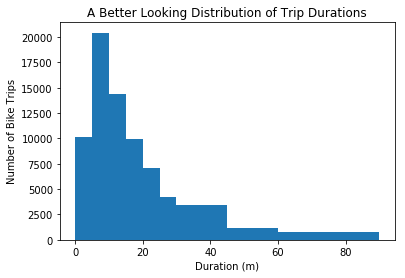

In [28]:
## Use this and additional cells to answer Question 5. ##
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = chicago_duration_data_list[0]
# when we work with NP arrays, there are more possibilities.
# I just played with BINs and figured it out, but a lesson learned for me it is worth to read more about the 
# math, python documentation is only about python 
bins = [0,5,10,15,20,25,30,45,60,90]
plt.hist(data,bins)
plt.title('A Better Looking Distribution of Trip Durations')
plt.xlabel('Duration (m)')
# a ylabel make the histogram more understandable 
plt.ylabel('Number of Bike Trips')
plt.show()





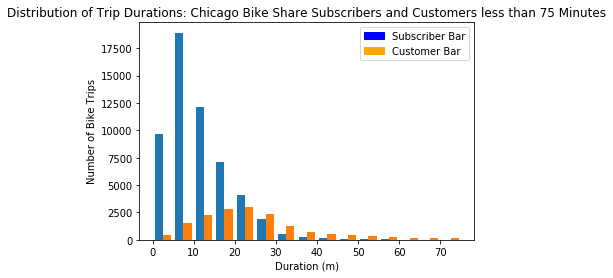

One can see that Subscribers have more bike trips of shorter length.
While Customers have less bike trips of longer length - they could be tourists.
P.S. for verification purposes,: 71127 bike trips are less than 75 minutes


In [29]:
## Use this and additional cells to answer Question 5. ##
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

# load library
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
# accidently, came to understand how to put both subscriber and customer data into one histogram
data = chicago_duration_data_list[1:3]
chicago_trips_less75_subscribers = len(chicago_duration_data_list[1])
chicago_trips_less75_customers   = len(chicago_duration_data_list[2])
chicago_trips_less75 = chicago_trips_less75_subscribers + chicago_trips_less75_customers
# bins with 5 minute intervals
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
plt.hist(data,bins)
#subscriber_bar, = plt.plot(chicago_duration_data_list[1], bins, label='Subscribers')
#customer_bar, = plt.plot(chicago_duration_data_list[2], bins, label='Customers')

# experimented with customized legends, but for this purpose using python default configurations is fine
# I will learn to do more in the future 
#plt.legend(handles=[subscriber_bar, customer_bar])
#red_patch = mpatches.Patch(color='red', label='The red data')
#plt.legend(handles=[red_patch])

subscriber_bar = mpatches.Patch(color='blue', label='Subscriber Bar')
customer_bar = mpatches.Patch(color='orange', label='Customer Bar')

plt.legend(handles=[subscriber_bar,customer_bar])
plt.title('Distribution of Trip Durations: Chicago Bike Share Subscribers and Customers less than 75 Minutes')
plt.xlabel('Duration (m)')
plt.ylabel('Number of Bike Trips')
plt.show()
print("One can see that Subscribers have more bike trips of shorter length.")
print("While Customers have less bike trips of longer length - they could be tourists.")
print("P.S. for verification purposes,:", chicago_trips_less75 , "bike trips are less than 75 minutes")




<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Replace this text with your responses and include a visualization below!

In [ ]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

In [112]:
import pandas as pd

# I wanted to play with data frames, I use the df.head to make sure that I have read into the dataframe correctly 

chicago_df = pd.read_csv('C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/Chicago-2016-Summary.csv') 

chicago_df.head()

,duration,month,hour,day_of_week,user_type,start_station_id,start_station_name
0,15.4333,3,23,Thursday,Subscriber,156,Clark St & Wellington Ave
1,3.3000,3,22,Thursday,Subscriber,259,California Ave & Francis Pl
2,2.0667,3,22,Thursday,Subscriber,344,Ravenswood Ave & Lawrence Ave
3,19.6833,3,22,Thursday,Subscriber,318,Southport Ave & Irving Park Rd
4,10.9333,3,22,Thursday,Subscriber,345,Lake Park Ave & 56th St


In [113]:
# I use df.describe to get basic statistics for my data frame, I can use these for verification purposes 
chicago_base_statistics = chicago_df.describe()
print (chicago_base_statistics)
print('From the vizualizations, one can see that the bike trips do not have a perfect normal distribution.')
print('But we can use the  68–95–99.7 rule as a heuristic.  95% of the bike rides are less than 90 minutes -')
print('this matches with our vizulization. It looks like July is the most popular month, and most (68%) of the')
print('bike trips are taken from mid-April to mid-September - knowing Chicago weather that seems logical.')
print('The most popular time to take a bike trips is 13:45. Most (68%) bike trips from 0900 to 1830 - ')
print('that also seems logical. Further, based on July data and when most bike trips are taken,')
print('I want to think about how many bikes do I need and at what station.')

           duration         month          hour  start_station_id
count  72131.000000  72131.000000  72131.000000      72131.000000
mean      16.563629      7.009081     13.765524        178.197391
std       32.848302      2.627587      4.693048        127.282634
min        1.000000      1.000000      0.000000          2.000000
25%        6.800000      5.000000     10.000000         74.000000
50%       11.683300      7.000000     15.000000        157.000000
75%       19.566700      9.000000     17.000000        268.000000
max     1439.416700     12.000000     23.000000        620.000000
From the vizualizations, one can see that the bike trips do not have a perfect normal distribution.
But we can use the  68–95–99.7 rule as a heuristic.  95% of the bike rides are less than 90 minutes -
this matches with our vizulization. It looks like July is the most popular month, and most (68%) of the
bike trips are taken from mid-April to mid-September - knowing Chicago weather that seems logical.
T

In [123]:
# for plotting purposes, I would need to have day_of_week as an integers - at least what I know hot to do now
# this time I will not try to plot day of the wee. 

chicago_togroupby_day_duration_df = chicago_df[['day_of_week','duration']] 
#print(chicago_togroupby_month_duration)
#grouped_data = grouped_data = example_df.groupby('even').sum()['value']
chicago_groupedby_day_count_duration_df = chicago_togroupby_day_duration_df.groupby(by='day_of_week').count()
print("Here are the Number of Bike Trips grouped by Day of the Week:")
# divide by 52 because these are yearly statistics and there are 52 weeks in the year 
print(chicago_groupedby_day_count_duration_df / 52)
print("\nTo me the consistency is surprising, but there are only 185 to 217 bike trips per day")

chicago_togroupby_day_duration_df = chicago_df[['day_of_week','duration']] 
#print(chicago_togroupby_month_duration)
#grouped_data = grouped_data = example_df.groupby('even').sum()['value']
print("\nHere are the Duration of Bike Trips grouped by Day of the Week:")
chicago_groupedby_day_sum_duration_df = chicago_togroupby_day_duration_df.groupby('day_of_week').sum()
# divide by 52 because these are yearly statistics and there are 52 weeks in the year
print(chicago_groupedby_day_sum_duration_df/52)
print("\nYou can see that people take longer trips on and around the weekends - 'The tourist effect?'")

Here are the Number of Bike Trips grouped by Day of the Week:
               duration
day_of_week            
Friday       206.557692
Monday       217.038462
Saturday     190.903846
Sunday       185.653846
Thursday     192.461538
Tuesday      209.826923
Wednesday    184.692308

To me the consistency is surprising, but there are only 185 to 217 bike trips per day

Here are the Duration of Bike Trips grouped by Day of the Week:
                duration
day_of_week             
Friday       3217.528200
Monday       3497.657665
Saturday     3938.532287
Sunday       3969.590073
Thursday     2681.713800
Tuesday      2999.918708
Wednesday    2671.042900

You can see that people take longer trips on and around the weekends - 'The tourist effect?'


Here you can see Chicago Bike Trips Grouped by hour:
0      1.316940
1      0.890710
2      0.478142
3      0.240437
4      0.374317
5      1.469945
6      5.530055
7     11.628415
8     14.901639
9      8.715847
10     7.704918
11    10.090164
12    11.497268
13    11.784153
14    11.472678
15    12.948087
16    18.092896
17    23.398907
18    15.808743
19    10.669399
20     6.882514
21     5.259563
22     3.677596
23     2.245902
Name: duration, dtype: float64

 Here you can see a line chart of Chicago Bike Trips Grouped by hour:


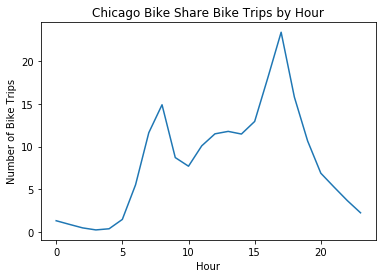

The vizualization shows: that the most popular time for bike trips is from 17:00 to 18:00,
this does not match with the statistical 68–95–99.7 rule  - because the distribution is not normal.
One can see that there a evening commuter rush

Here you can see Chicago Bike Trips' Duration Grouped by Hour:
0      26.357517
1      22.617624
2       9.646448
3       3.275364
4       4.979509
5      20.690301
6      60.856237
7     133.744397
8     188.694946
9     131.822493
10    142.927409
11    195.354962
12    217.193996
13    227.399861
14    232.294076
15    262.768576
16    300.050646
17    359.646762
18    251.538746
19    174.288853
20    106.997810
21     92.536385
22     55.364481
23     43.300002
Name: duration, dtype: float64


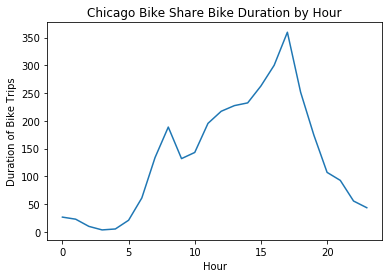

Duration of Bike Trips have a visual correlatation with the Number of Bike trips.


In [133]:
import matplotlib.pyplot as plt
import pandas as pd

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 


# I get the data that I want to plot
chicago_togroupby_hour_duration_df = chicago_df[['hour','duration']] 
#chicago_togroupby_month_duration_df = chicago_df[['duration','month']] 
# I do a group by was as_index = to false because I want to make lists for plotting, I use count to get the number 
# of bike trips
#chicago_groupedby_month_duration_df = chicago_togroupby_month_duration_df.groupby('month',as_index=False).count()
chicago_groupedby_hour_count_duration_df = chicago_togroupby_hour_duration_df.groupby('hour',as_index=False).count()
# divided by 366 to get hourly because count is for the whole year 
chicago_groupedby_hour_count_duration_366_df = chicago_groupedby_hour_count_duration_df / 366
# I make a list for month
chicago_count_duration_hour = list(chicago_groupedby_hour_count_duration_df['hour'])
# I make a list for count
chicago_count_duration_inahour = list(chicago_groupedby_hour_count_duration_366_df['duration'])
# I do a group by was as_index = to false because I want to make lists for plotting, I use sum to get the duration 
# of bike trips
chicago_groupedby_hour_sum_duration_df = chicago_togroupby_hour_duration_df.groupby('hour',as_index=False).sum()
# I make a list for month
# divided by 366 to get hourly because sum is for the whole year
chicago_groupedby_hour_sum_duration_366_df = chicago_groupedby_hour_sum_duration_df / 366
chicago_sum_duration_hour = list(chicago_groupedby_hour_sum_duration_df['hour'])
# I make a list for sum
chicago_sum_duration_inahour = list(chicago_groupedby_hour_sum_duration_366_df['duration'])


print("Here you can see Chicago Bike Trips Grouped by hour:")
print(chicago_groupedby_hour_count_duration_366_df['duration'])
# I used my lists for plotting, maybe there is a better way to do this from a group by but this is why
# I am taking the Udacity Data Analysis, this is what I know how to do for now 
plt.plot(chicago_count_duration_hour,chicago_count_duration_inahour)
print("\n Here you can see a line chart of Chicago Bike Trips Grouped by hour:")
plt.title('Chicago Bike Share Bike Trips by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Trips')
plt.show()
print("The vizualization shows: that the most popular time for bike trips is from 17:00 to 18:00,")
print("this does not match with the statistical 68–95–99.7 rule  - because the distribution is not normal.")
print("One can see that there a evening commuter rush")
print("\nHere you can see Chicago Bike Trips' Duration Grouped by Hour:")
print(chicago_groupedby_hour_sum_duration_366_df['duration'])
# I used my lists for plotting, maybe there is a better way to do this from a group by but this is why
# I am taking the Udacity Data Analysis, this is what I know how to do for now 
plt.plot(chicago_sum_duration_hour, chicago_sum_duration_inahour)
plt.title('Chicago Bike Share Bike Duration by Hour')
plt.xlabel('Hour')
plt.ylabel('Duration of Bike Trips')
plt.show()
print("Duration of Bike Trips have a visual correlatation with the Number of Bike trips.")

Here you can see Chicago Bike Trips Grouped by Month:
    month  duration
0       1      1901
1       2      2394
2       3      3719
3       4      4567
4       5      7211
5       6      9794
6       7     10286
7       8      9810
8       9      8700
9      10      7160
10     11      4811
11     12      1778

 Here you can see a line chart of Chicago Bike Trips Grouped by Month:


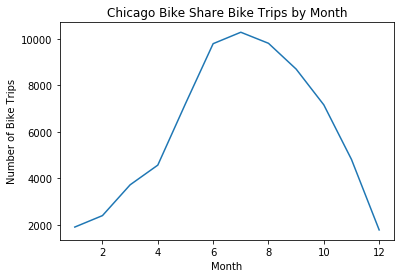

The vizualization shows: It looks like July is the most popular month, but the vizualization also shows
that October is still popular - the distribution is not perfectly normal.

Here you can see Chicago Bike Trips' Duration Grouped by Month:
    month     duration
0       1   20123.3844
1       2   29349.1814
2       3   48179.4821
3       4   75996.9328
4       5  129601.5888
5       6  175539.0696
6       7  202220.4824
7       8  175718.9345
8       9  146131.3146
9      10  107158.3446
10     11   64913.3338
11     12   19819.0999


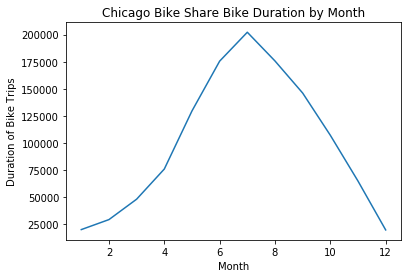

It looks like when it gets colder, bike riders take shorter trips.


In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 
# I get the data that I want to plot
chicago_togroupby_month_duration_df = chicago_df[['duration','month']] 
# I do a group by was as_index = to false because I want to make lists for plotting, I use count to get the number 
# of bike trips
chicago_groupedby_month_duration_df = chicago_togroupby_month_duration_df.groupby('month',as_index=False).count()
# I make a list for month
chicago_duration_month = list(chicago_groupedby_month_duration_df['month'])
# I make a list for count
chicago_count_duration_inamonth = list(chicago_groupedby_month_duration_df['duration'])
# I do a group by was as_index = to false because I want to make lists for plotting, I use sum to get the duration 
# of bike trips
chicago_groupedby_month_sum_duration_df = chicago_togroupby_month_duration_df.groupby('month',as_index=False).sum()
# I make a list for month
chicago_sum_duration_month = list(chicago_groupedby_month_sum_duration_df['month'])
# I make a list for sum
chicago_sum_duration_inamonth = list(chicago_groupedby_month_sum_duration_df['duration'])


print("Here you can see Chicago Bike Trips Grouped by Month:")
print(chicago_groupedby_month_duration_df)
# I used my lists for plotting, maybe there is a better way to do this from a group by but this is why
# I am taking the Udacity Data Analysis, this is what I know how to do for now 
plt.plot(chicago_duration_month,chicago_count_duration_inamonth)
print("\n Here you can see a line chart of Chicago Bike Trips Grouped by Month:")
plt.title('Chicago Bike Share Bike Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips')
plt.show()
print("The vizualization shows: It looks like July is the most popular month, but the vizualization also shows")
print("that October is still popular - the distribution is not perfectly normal.")
print("\nHere you can see Chicago Bike Trips' Duration Grouped by Month:")
print(chicago_groupedby_month_sum_duration_df)
# I used my lists for plotting, maybe there is a better way to do this from a group by but this is why
# I am taking the Udacity Data Analysis, this is what I know how to do for now 
plt.plot(chicago_sum_duration_month,chicago_sum_duration_inamonth)
plt.title('Chicago Bike Share Bike Duration by Month')
plt.xlabel('Month')
plt.ylabel('Duration of Bike Trips')
plt.show()
print("It looks like when it gets colder, bike riders take shorter trips.")

In [52]:
chicago_togroupby_day_station_df = chicago_df[['start_station_id', 'start_station_name', 'duration']] 
#print(chicago_togroupby_day_station_df)
#print(chicago_togroupby_month_duration)
#grouped_data = grouped_data = example_df.groupby('even').sum()['value']
chicago_groupedby_station_sum_duration_df = chicago_togroupby_day_station_df.groupby(by='start_station_name').count()
print('The group by station id can be used can be used for verification purposes.')
print('\n',chicago_groupedby_station_sum_duration_df)


The group by station id can be used can be used for verification purposes.

                                     start_station_id  duration
start_station_name                                            
2112 W Peterson Ave                               13        13
63rd St Beach                                     25        25
900 W Harrison St                                119       119
Aberdeen St & Jackson Blvd                       195       195
Aberdeen St & Monroe St                          212       212
Ada St & Washington Blvd                         162       162
Adler Planetarium                                438       438
Albany (Kedzie) Ave & Montrose Ave                 8         8
Albany Ave & 26th St                               6         6
Albany Ave & Bloomingdale Ave                     85        85
Artesian Ave & Hubbard St                        122       122
Ashland Ave & 13th St                             31        31
Ashland Ave & 21st St                    

In [225]:
import pandas as pd
import csv
chicago_hour_bike_rides = []
chicago_hour_month_bike_rides = []

# get one month of data
for hour_month_rides in chicago_summary_data:
    if hour_month_rides['month'] == '7':
        chicago_hour_month_bike_rides.append(hour_month_rides) 
        
# save it to a CSV file I will use the group by function - I know that I could convert the dictionary to a 
# dataframe but that is learning for the future
chicago_hour_month_file = 'C:/Users/Kims/Documents/Data_Analysis_2017/bike_share/bike_share_analysis/data/chicago_hour_month.csv'
with open(chicago_hour_month_file, 'w',newline='') as f_out:
    #print(chicago_hour_month_file)
    out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type','start_station_id','start_station_name']        
    trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
    trip_writer.writeheader()
        
    for hour_month_record in chicago_hour_month_bike_rides:
        #print(hour_month_record)
        trip_writer.writerow(hour_month_record)

# read in the CSV vile was a data fram
chicago_hour_month_df = pd.read_csv(chicago_hour_month_file)

# select data for gropu by operations 
chicago_togroupby_month_count_df = chicago_hour_month_df[['start_station_id','start_station_name']]
# at the number of bike trips by station, it seems to be group by is the most effective way to do this
chicago__hour_month_count_df = chicago_togroupby_month_count_df.groupby(by='start_station_id').count()
# divide by 31 to get station trips per day 
chicago__hour_month_count_31_df = chicago_togroupby_month_count_df.groupby(by='start_station_id').count() / 31
# prepare data for putting into a list - you cannot see all the group by stations
chicago_month_smart_station_df = chicago_hour_month_count_31_df['start_station_id']
# define the list 
chicago_hour_month_list = []
# get the keys
chicago_hour_month_keys = chicago_month_smart_station.keys()
# initialize coung
count = -1 
for hour in chicago_month_smart_station_df:
    count+= 1
    # append the keys using count
    chicago_hour_month_list.append(chicago_hour_month_keys[count])
    # append the record, use the round operation to see if there has been a bike ride from a station 
    chicago_hour_month_list.append(round(hour,0))

print('The list could be exported as a CSV. You can see that many stations, even in July, do not have a bike ride\n')
print(chicago_hour_month_list)
print('\nThis is what the Number of Bike Rides(float) per Day grouped by looks like.\n')
print(chicago_month_smart_station)


The list could be exported as a CSV. You can see that many stations, even in July, do not have a bike ride

['2112 W Peterson Ave', 0.0, '63rd St Beach', 0.0, '900 W Harrison St', 1.0, 'Aberdeen St & Jackson Blvd', 1.0, 'Aberdeen St & Monroe St', 1.0, 'Ada St & Washington Blvd', 1.0, 'Adler Planetarium', 2.0, 'Albany (Kedzie) Ave & Montrose Ave', 0.0, 'Albany Ave & 26th St', 0.0, 'Albany Ave & Bloomingdale Ave', 0.0, 'Artesian Ave & Hubbard St', 0.0, 'Ashland Ave & 13th St', 0.0, 'Ashland Ave & 21st St', 0.0, 'Ashland Ave & Archer Ave', 0.0, 'Ashland Ave & Augusta Blvd', 0.0, 'Ashland Ave & Belle Plaine Ave', 0.0, 'Ashland Ave & Blackhawk St', 0.0, 'Ashland Ave & Chicago Ave', 1.0, 'Ashland Ave & Division St', 2.0, 'Ashland Ave & Grace St', 0.0, 'Ashland Ave & Grand Ave', 0.0, 'Ashland Ave & Harrison St', 0.0, 'Ashland Ave & Lake St', 0.0, 'Ashland Ave & McDowell Ave', 0.0, 'Ashland Ave & Wellington Ave', 0.0, 'Ashland Ave & Wrightwood Ave', 1.0, 'Austin Blvd & Chicago Ave', 0.0, 'Aust

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Replace this text with your response!

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

In [246]:
print("My posed questions:")
print("1) How many bikes do I need for the next year? To make a this decision it this I need to understand how the bikes")
print("have been used this year, and then based on the data I can make a data based decision.")
print("2) How many bikes does a Station need to have? I could imagine that bikes could be moved from one station to another each day.")
print("To make a data based decision, I need understand how many bikes are being used by each station in a day.")
chicago_july_duration = chicago_sum_duration_inamonth[6]
#print('chicago_july_duration',chicago_july_duration)
number_of_bikes = int(chicago_july_duration / 35)
print("\nMy data based conclusions:")
print("1) Referencing https://www.divvybikes.com/how-it-works, Chicago bike share has 5 800 bikes as of December 2017")
print("If we divide the sum of July duration by 35, this equals {} bikes"
      .format(number_of_bikes))
print("This means that even in July the bikes were only being used 35% of the time. More bikes are not needed")
print("2) As of December 2017, there are 580 bike stations.  Referencing my July 2016 analysis, 478 stations were used.")
print("Many of the stations were not even used. Transporting bikes is not an issue")
print("3) Referencing http://www.chicagotribune.com/news/local/breaking/ct-divvy-daily-fee-hike-met-0717-20150717-story.html")
print("It turns out that Chicago bike share loses money.  From a data point of view, there are too many bikes")
print("and too many stations.")
print("Referencing https://www.economist.com/news/business/21731675-one-answer-would-be-ofo-and-mobike-merge-chinas-bicycle-sharing-giants-are-still-trying,")
print("it seems like using smart locks could help optimize bike usage.  For bike sharing, it is still early days. ")
print("Profitability can be hoped for in the future")

My posed questions:
1) How many bikes do I need for the next year? To make a this decision it this I need to understand how the bikes
have been used this year, and then based on the data I can make a data based decision.
2) How many bikes does a Station need to have? I could imagine that bikes could be moved from one station to another each day.
To make a data based decision, I need understand how many bikes are being used by each station in a day.

My data based conclusions:
1) Referencing https://www.divvybikes.com/how-it-works, Chicago bike share has 5 800 bikes as of December 2017
If we divide the sum of July duration by 35, this equals 5777 bikes
This means that even in July the bikes were only being used 35% of the time. More bikes are not needed
2) As of December 2017, there are 580 bike stations.  Referencing my July 2016 analysis, 478 stations were used.
Many of the stations were not even used. Transporting bikes is not an issue
3) Referencing http://www.chicagotribune.com/new

When I have done Financial Analysis in the past, I learned the business from customer, colleauges, and customers. This was a new experience, that I first analyzed the data, and then I learned about the business. I looked at internet information after I had done my data analysis.

I am happy with my decision to do the Data Analsyis nanodegree.  For data analysis purposes, I have gotten a good basis in Python.  I know that there is still more to learn.  These new and renewed skill will help me in my future job. In this project, I tried things beyond the project requirements.  

If I get the chance to work in Data Analysis, the next step would be to learn machine learning.  5-10 years ago, it was very expensive for companies to make their own predictive models.  With machine leaning, I see that small companies can now make their own predective modes. I now understand that Data Analysis is the basis to validate machine learning.  

http://www.chicagotribune.com/news/local/breaking/ct-divvy-daily-fee-hike-met-0717-20150717-story.html

The daily fee to rent a Divvy bike will jump by more than 40 percent next week because of a deficit and escalating costs to run the expanding bicycle-sharing system, officials are set to announce Friday. The annual membership will remain at $75.

Starting Wednesday, the boost from $7 to $9.95 for a 24-hour pass is expected to generate an extra $400,000 during the remainder of 2015, or $800,000 on an annual basis, according to the city and Motivate. That Brooklyn-based company recently took over operation of the 2-year-old program for Chicago under a five-year contract for up to $65 million.

A 24-hour pass includes an unlimited number of trips, each lasting 30 minutes or less.

The Emanuel administration introduced Divvy in 2013 after the city received more than $30 million in government funding to build the bike-share system. Its stated goals were to ensure that the program would be financially self-sustaining and generate revenue growth to support more bicycling infrastructure across Chicago to help reduce traffic congestion, improve air quality and encourage more active lifestyles.

The financial endgame is a work in progress, as Divvy has yet to steer clear of red ink, despite some creative bookkeeping, city officials indicated. They said that although Divvy has proved popular among visitors to the downtown and other venues, revenue from daily fees has fallen short of projections, spurring the need to raise the rate.

"Divvy was launched at a time when big cities were just beginning to launch bike-share programs, and many of the financial predictions we made were based on other industries, without having a direct precedent to look to in the bike-share world," the city said in a statement. "... We expect that as the bike-share industry matures, we will be able to attract even more revenue in this manner."

One-year Divvy discount coming for low-income Chicagoans
Divvy posted a $500,000 operating loss in 2014, and the city used grants that it received for the federally funded program to erase the deficit, city officials said.

It followed a 2013 operating loss of $171,000, according to city documents. Under the contract, the city bore $154,000 of the loss, while Alta Bicycle Share, the original Divvy contractor that was subsequently bought by Motivate, was responsible for $17,000. Operational revenue from 2014 was used to cover the 2013 loss, officials said.

About 86 percent of Divvy's more than 27,000 annual members are Chicago residents, and the price hike in the 24-hour pass will mostly affect tourists and other infrequent users, according to the Chicago Department of Transportation.

Roughly two-thirds of daily users are visitors, CDOT said. It said that nearly 750,000 24-hour passes have been sold to date.

Chicago Transportation Commissioner Rebekah Scheinfeld defended the first rate hike by the public-private partnership that launched Divvy in River North and downtown. Since then, the service area has doubled, she noted.





In [ ]:
https://www.economist.com/news/business/21731675-one-answer-would-be-ofo-and-mobike-merge-chinas-bicycle-sharing-giants-are-still-trying

STEVE JOBS liked to describe computers as “bicycles for the mind”—tools that let humans do things faster and more 
efficiently than their bodies would allow. The internet-connected bikes flooding the streets of urban China could be 
called “computers for the road”. Networked, trackable and data-generating, they are ones and zeros in aluminium form.

The cycles belong to Ofo and Mobike, two startups that, taken together, have raised $2.2bn of capital and are valued at 
more than $4bn. Each has between 7m and 10m bikes in China, averages 30m-35m rides a day and, having entered more than 100 
Chinese cities, is expanding abroad. At the start of 2016 neither firm had a single bike on a public road. 
Ofo’s canary-yellow cycles and Mobike’s silver-and-orange ones can now be found in cities from Adelaide to London 
and Singapore to Seattle.

Most city bike-sharing systems, such as the Vélib scheme in Paris, depend on fixed docks in which cycles must be parked. 
Ofo and Mobike instead pioneered a “dockless” bike secured with a smart lock that can be released with a smartphone app. 
They charge much less than public programmes. In London it costs £2 ($2.66), and typically lots of poking at an 
unresponsive kiosk-mounted screen, just to unlock a city-run shared bike. The equivalent with an Ofo, after an initial 
deposit, is 50 pence every half an hour and a few seconds to get going. In China rides cost between 0.50 and 
1 yuan ($0.08-0.15) for 30 minutes.

It helps that the firms save on physical infrastructure such as docks. But the main reason they can afford such low fees
is because they have abundant funding: in June Mobike raised $600m, much of it from Tencent, a messaging, gaming and 
payments giant. (Qualcomm, an American chipmaker, made a smaller investment this month.) In July Ofo raised $700m in 
a funding round led by Alibaba, an e-commerce and payments company.

Many smaller, copycat bike-share startups have gone under. Last week it emerged that Bluegogo, a distant third in China’s
bike-sharing wars, had gone bust. Its puny $90m in funding and 700,000 bikes were no match for the market leaders.
Another operator shut down after 90% of its 1,200 bikes were stolen six months after launch. Many schemes have been 
funded with scant financial analysis by investors.

Nor are Ofo and Mobike profitable, though not for want of growth. China’s bike-sharing market grew from 33m yuan in the 
third quarter of 2016 to 3.9bn yuan in the second quarter of 2017, says iResearch, a market-research firm. Zhang Yanqi, 
an Ofo co-founder, thinks China could support 300m rides a day, up from 50m-60m today. Both firms believe rental fees 
alone could make them profitable businesses if they stopped spending on expansion at home and abroad.

Analysts reckon the real money may be in other sources of revenue. The firms hold hundreds of millions worth of yuan in
deposits collected from users. For now this money lies unutilised—Chinese law is unclear about how, if it all, it can be 
used. But firms hope that will change. Lending it would be one possibility. Another idea is a sort of crowdsourced 
logistics, asking riders to carry along packages in exchange for free rides or a small payment. Mobike already incentivises
users to move its bikes around to high-demand areas by offering “red envelopes” worth a few yuan. Advertising on
“billboards” within wheels is also a promising avenue. And the firms can agree with brands to offer digital coupons for 
shops on a rider’s route. Mobike works with McDonald’s and JD.com, an e-commerce company, to do just that.

But most value could come from data, especially used in partnership with Alibaba and Tencent. 
The bike-sharing firms are already becoming part of their strategic investors’ business models. Ofo uses Alibaba’s 
credit-rating system to allow users to rent bikes with no deposit, for example. More data could be shared. As Mr Zhang 
puts it, the firm’s main investor, Alibaba, “already knows how much [users] spend, where they spend it and what they spend
it on. But with us they have a very strong idea of people’s total activity.” Mobike says it does not share data on a 
commercial basis with any firm.

The bike wars recall the one between ride-hailing firms in China, which ended with mergers that left one player, Didi 
Chuxing. Rumours of a possible merger between Ofo and Mobike have been swirling for weeks. Allen Zhu, an early investor in
Ofo who is pushing for a merger, says making money is terrifically hard with so much competition. But neither Ofo nor
Mobike is willing publicly to admit it. “In my entire career at Ofo I have spent less than five minutes talking about
a merger with Mobike,” says Mr Zhang. “I don’t see any point or meaning in merging,” maintains Mobike’s president, 
Hu Weiwei.
